Načítám efemeridy DE421...


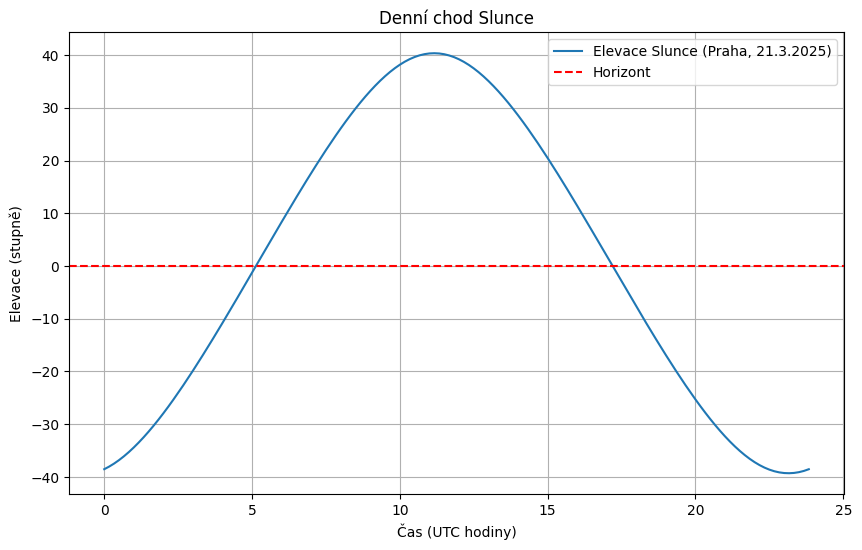

In [1]:
# notebooks/01_sun_tracking.ipynb
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

# Přidání src do path
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../src')))

from illumination_model.astrometry import AstrometryEngine, ObserverLocation

# Inicializace
engine = AstrometryEngine()
prague = ObserverLocation(50.0755, 14.4378)

# Generování časové osy (24 hodin po 10 minutách)
times = []
elevations = []
base_time = engine.ts.utc(2025, 3, 21, 0, 0, 0) # Jarní rovnodennost

for hour in range(24):
    for minute in range(0, 60, 10):
        t = engine.ts.utc(2025, 3, 21, hour, minute)
        alt, _, _ = engine.calculate_sun_position(prague, t)
        elevations.append(alt)
        times.append(hour + minute/60.0)

# Vykreslení
plt.figure(figsize=(10, 6))
plt.plot(times, elevations, label='Elevace Slunce (Praha, 21.3.2025)')
plt.axhline(0, color='red', linestyle='--', label='Horizont')
plt.xlabel('Čas (UTC hodiny)')
plt.ylabel('Elevace (stupně)')
plt.title('Denní chod Slunce')
plt.grid(True)
plt.legend()
plt.show()